In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Loading the data

In [146]:
data = '/content/drive/MyDrive/fake-news-multimodal/textdata/extracted_text_data.csv'

In [147]:
df = pd.read_csv(data)

In [148]:
df.head(10)

,image_path,label,extracted_text
0,/content/drive/MyDrive/fake-news-multimodal/da...,fake,iv\nJAMUNA tv\nলাইভে এসে পদত্যাগের ঘোষণা
1,/content/drive/MyDrive/fake-news-multimodal/da...,fake,JOURNEY\nভাবিনি জয় ট্রাম্পের হয়ে ভোট চাইবে
2,/content/drive/MyDrive/fake-news-multimodal/da...,fake,BREAKING NEWS\nTRUMP FINALLY CAUGHT
3,/content/drive/MyDrive/fake-news-multimodal/da...,fake,হেরে গিয়েছে ছাত্র-জনতা\nওবায়দুল কাদেরের ভয়ঙ...
4,/content/drive/MyDrive/fake-news-multimodal/da...,fake,দুপুরের\nবাংলাদেশ\nJOURNEY\nশেখ হাসিনাকে আনাতে...
5,/content/drive/MyDrive/fake-news-multimodal/da...,fake,JOURNEY\nআ.লীগের সামনে খাওয়া শেষ?
6,/content/drive/MyDrive/fake-news-multimodal/da...,fake,news today tv\nজয় বাংলা স্লোগানে উত্তপ্ত\nজয় ব...
7,/content/drive/MyDrive/fake-news-multimodal/da...,fake,এখানে মূল ছবি থেকে পাওয়া সমস্ত লেখা দেওয়া হলো:...
8,/content/drive/MyDrive/fake-news-multimodal/da...,fake,কপাল পুড়লো ইউনূসের\nবাংলাদেশ আওয়ামী লীগ\nnews...
9,/content/drive/MyDrive/fake-news-multimodal/da...,fake,entertainment\nশীঘ্রই মুক্তি পাচ্ছে বাবর


### No null values

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      4000 non-null   object
 1   label           4000 non-null   object
 2   extracted_text  4000 non-null   object
dtypes: object(3)
memory usage: 93.9+ KB


### No dublicates

In [150]:
df.duplicated().sum()

np.int64(0)

### Visualizing Fake vs Real count

--- Label Counts ---
label
fake    2000
real    2000
Name: count, dtype: int64




/tmp/ipython-input-3690393480.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis', order=df['label'].value_counts().index)


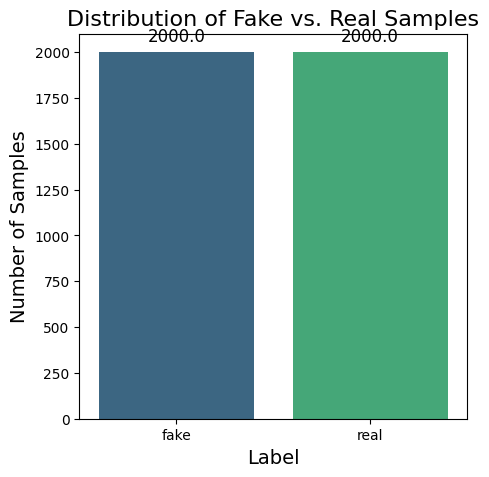

In [151]:
# Check the unique values and their counts
print("--- Label Counts ---")
print(df['label'].value_counts())
print("\n")

plt.figure(figsize=(5, 5))

# Create the countplot
sns.countplot(x='label', data=df, palette='viridis', order=df['label'].value_counts().index)

# Add title and labels
plt.title('Distribution of Fake vs. Real Samples', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

# Add the exact count on top of each bar for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha = 'center', va = 'bottom',
                       xytext = (0, 5),
                       textcoords = 'offset points',
                       fontsize=12)

plt.show()

### Visualizing BN vs EN text

--- Language Counts ---
language
BN    2000
EN    2000
Name: count, dtype: int64




/tmp/ipython-input-1530898993.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language',


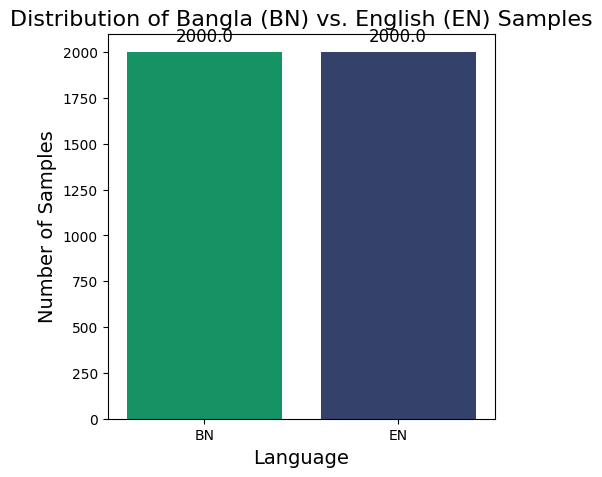

In [152]:
# Function to extract the language code (BN or EN) from the path
def extract_language(path):
    # Regex to capture the two-letter code (BN or EN) immediately following /fake/ or /real/
    match = re.search(r'/(?:fake|real)/([A-Z]{2})/', path)
    if match:
        return match.group(1)
    return 'Other' # Default if not found

# Apply the extraction function to the image_path column
df['language'] = df['image_path'].apply(extract_language)

# Display the counts of the extracted languages
print("--- Language Counts ---")
print(df['language'].value_counts())
print("\n")

plt.figure(figsize=(5, 5))

# Create the countplot using the 'language' column
sns.countplot(x='language',
              data=df,
              palette={'BN': '#00A86B', 'EN': '#2A3C74', 'Other': 'gray'}, # Use distinct colors
              order=df['language'].value_counts().index)

# Add title and labels
plt.title('Distribution of Bangla (BN) vs. English (EN) Samples', fontsize=16)
plt.xlabel(xlabel='Language', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

# Optional: Add the exact count on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha = 'center', va = 'bottom',
                       xytext = (0, 5),
                       textcoords = 'offset points',
                       fontsize=12)

plt.show()

### Distribution on text length

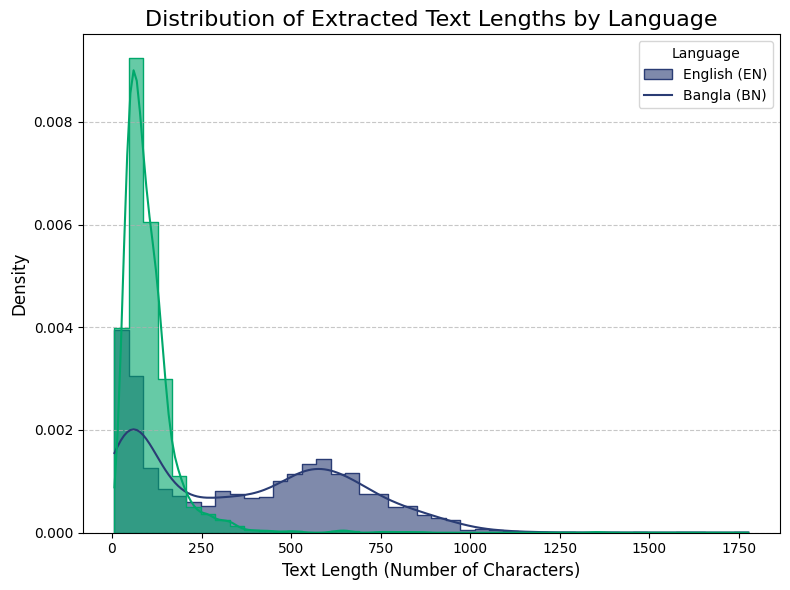

In [153]:
# 1. Calculate the length of the extracted text
df['text_length'] = df['extracted_text'].str.len()

# 2. Visualize the text length distribution using a histogram with KDE
plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x='text_length',
    hue='language', #tells the histplot function to look at the values in the language column ('BN' and 'EN').
    kde=True,
    palette={'BN': '#00A86B', 'EN': '#2A3C74'},
    alpha=0.6,
    element="step",
    stat="density", # Normalize to show density
    common_norm=False # Normalize each distribution independently
)

# Add labels and title
plt.title('Distribution of Extracted Text Lengths by Language', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Create manual legend
plt.legend(title='Language', labels=['English (EN)', 'Bangla (BN)'])

# Show grid and tight layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

### Applying Preprocessing

In [154]:
import re
import string

# List of characters to be removed or replaced
PUNCT_TO_REMOVE = string.punctuation # Includes ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~
URL_REGEX = r'https?://\S+|www\.\S+'
EMOJI_REGEX = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "]+", flags=re.UNICODE
)

def comprehensive_cleaner(text):
    if pd.isna(text) or not text:
        return ""

    # 1. Decode to string and lower-case (optional for RoBERTa, but often helpful)
    text = str(text).lower()

    # 2. Remove URLs
    text = re.sub(URL_REGEX, '', text)

    # 3. Remove Emojis
    text = EMOJI_REGEX.sub(r'', text)

    # 4. Remove standard punctuation
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

    # 5. Normalize whitespace (replace multiple spaces/tabs/newlines with a single space)
    text = text.replace('\n', ' ').replace('\r', ' ')

    # 6. Remove non-Bangla/non-English characters (e.g., specific OCR noise)
    # This regex keeps letters, numbers, and common Bangla/English character
    text = re.sub(r'[^\w\s\u0980-\u09FF]+', '', text, flags=re.UNICODE)

    return text

# Apply the cleaning function to your extracted_text column
df['processed_text'] = df['extracted_text'].apply(comprehensive_cleaner)

# 2. Initial Column Operations
# Rename the text column to match the rest of your flow (if necessary)
df.rename(columns={'extracted_text': 'text_content'}, inplace=True)

# Drop non-essential columns (assuming 'index' column exists from the original load)
print("Dropping 'index' and 'image_path' columns...")
# Ensure 'index' is dropped if it exists
if 'index' in df.columns:
    df.drop(columns=['index', 'image_path'], inplace=True)
else:
    # If 'index' was already dropped or not loaded with that name, just drop 'image_path'
    df.drop(columns=['image_path'], inplace=True)

df['text_content'] = df['text_content'].astype(str)

# 3. Apply Cleaning (Calls the function defined above)
print("Applying comprehensive text cleaning...")
# Apply the cleaner to the 'text_content' column
df['text_content'] = df['text_content'].apply(comprehensive_cleaner)

# 4. Filter Empty and Missing Data
df.dropna(subset=['label'], inplace=True)
df = df[df['text_content'].str.strip() != ""]
print(f"Data filtered. Remaining rows: {len(df)}")

# 5. Label Encoding (Standardized)
print("Encoding labels ('fake'->0, 'real'->1)...")
label_map = {'fake': 0, 'real': 1}

# Standardize to lowercase before mapping for robustness
df['label'] = df['label'].astype(str).str.lower().map(label_map)

# Drop rows that couldn't be mapped (if original data had other labels)
df.dropna(subset=['label'], inplace=True)
df['label'] = df['label'].astype(int)

print(f"Final labels encoded. DataFrame ready for splitting.")

Dropping 'index' and 'image_path' columns...
Applying comprehensive text cleaning...
Data filtered. Remaining rows: 4000
Encoding labels ('fake'->0, 'real'->1)...
Final labels encoded. DataFrame ready for splitting.


In [155]:
df.head(60)

,label,text_content,language,text_length,processed_text
0,0,iv jamuna tv লাইভে এসে পদত্যাগের ঘোষণা,BN,38,iv jamuna tv লাইভে এসে পদত্যাগের ঘোষণা
1,0,journey ভাবিনি জয় ট্রাম্পের হয়ে ভোট চাইবে,BN,41,journey ভাবিনি জয় ট্রাম্পের হয়ে ভোট চাইবে
2,0,breaking news trump finally caught,BN,34,breaking news trump finally caught
3,0,হেরে গিয়েছে ছাত্রজনতা ওবায়দুল কাদেরের ভয়ঙ্ক...,BN,65,হেরে গিয়েছে ছাত্রজনতা ওবায়দুল কাদেরের ভয়ঙ্ক...
4,0,দুপুরের বাংলাদেশ journey শেখ হাসিনাকে আনাতে ইন...,BN,77,দুপুরের বাংলাদেশ journey শেখ হাসিনাকে আনাতে ইন...
5,0,journey আলীগের সামনে খাওয়া শেষ,BN,33,journey আলীগের সামনে খাওয়া শেষ
6,0,news today tv জয় বাংলা স্লোগানে উত্তপ্ত জয় বাং...,BN,122,news today tv জয় বাংলা স্লোগানে উত্তপ্ত জয় বাং...
7,0,এখানে মূল ছবি থেকে পাওয়া সমস্ত লেখা দেওয়া হলো ...,BN,640,এখানে মূল ছবি থেকে পাওয়া সমস্ত লেখা দেওয়া হলো ...
8,0,কপাল পুড়লো ইউনূসের বাংলাদেশ আওয়ামী লীগ news t...,BN,135,কপাল পুড়লো ইউনূসের বাংলাদেশ আওয়ামী লীগ news t...
9,0,entertainment শীঘ্রই মুক্তি পাচ্ছে বাবর,BN,39,entertainment শীঘ্রই মুক্তি পাচ্ছে বাবর


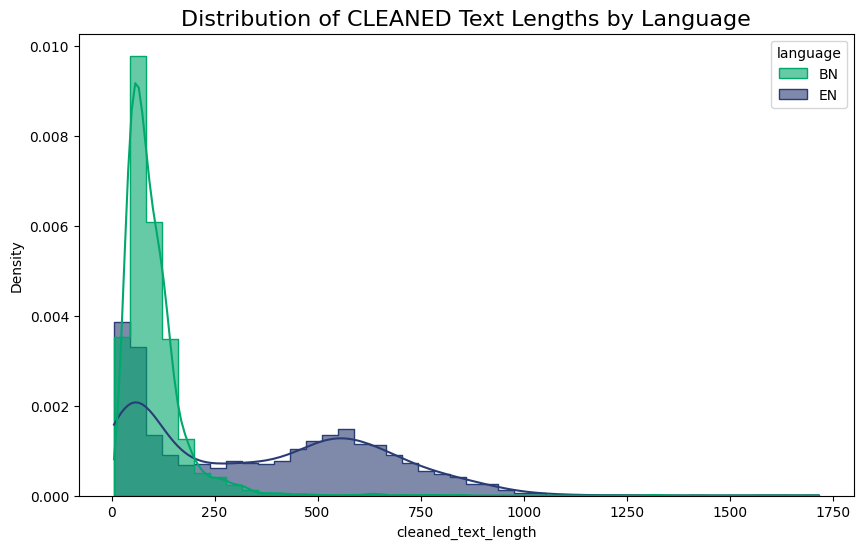

In [156]:
# Assuming you named the cleaned column 'processed_text'
df['cleaned_text_length'] = df['processed_text'].str.len()

# Rerun the plotting code, changing x='text_length' to x='cleaned_text_length'
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='cleaned_text_length', # <-- USE THE CLEANED LENGTH
    hue='language',
    kde=True,
    palette={'BN': '#00A86B', 'EN': '#2A3C74'},
    alpha=0.6,
    element="step",
    stat="density", # Normalize to show density
    common_norm=False # Normalize each distribution independently
)
plt.title('Distribution of CLEANED Text Lengths by Language', fontsize=16)
plt.show()

### Analyzing the max token length suitable for our model

Optimal MAX_LEN (95th Percentile Token Length): 171


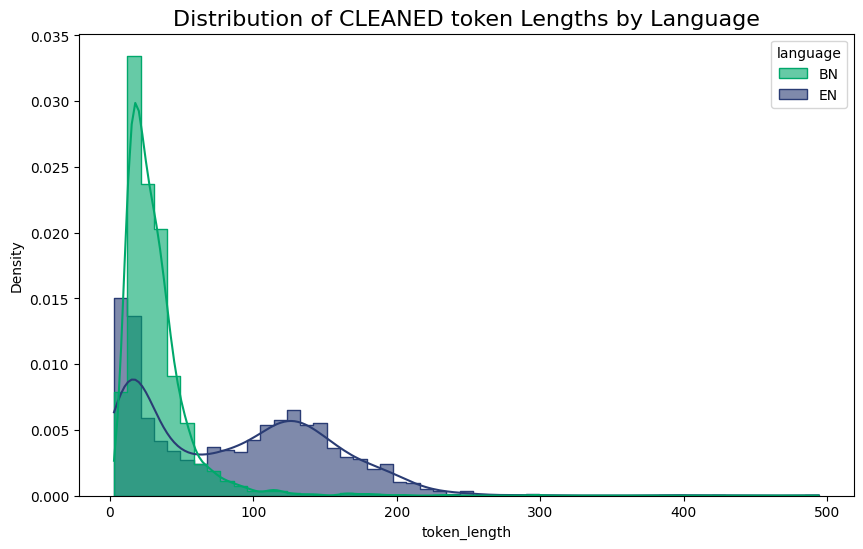

In [157]:
from transformers import AutoTokenizer

# --- Configuration ---
MODEL_NAME = 'xlm-roberta-base'
MAX_LEN_QUANTILE = 0.95

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# 2. Calculate the token count
df['token_length'] = df['processed_text'].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=True, truncation=False))
)

# 3. Print and plot the 95th percentile
quantile_95 = df['token_length'].quantile(MAX_LEN_QUANTILE)
print(f"Optimal MAX_LEN (95th Percentile Token Length): {quantile_95:.0f}")

# ... (plotting code similar to the previous answer, using x='token_length') ...
# Rerun the plotting code, changing x='text_length' to x='cleaned_text_length'
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='token_length', # <-- USE THE CLEANED LENGTH
    hue='language',
    kde=True,
    palette={'BN': '#00A86B', 'EN': '#2A3C74'},
    alpha=0.6,
    element="step",
    stat="density", # Normalize to show density
    common_norm=False # Normalize each distribution independently
)
plt.title('Distribution of CLEANED token Lengths by Language', fontsize=16)
plt.show()

The value Optimal MAX_LEN ($\mathbf{172}$) is the 95th percentile of the token lengths in my dataset.

*   This means that:95% of the samples (the vast majority of the data) are 172 tokens long or shorter.
*   Only 5% of the samples are longer than 172 tokens.



In [158]:
df.head(10)

,label,text_content,language,text_length,processed_text,cleaned_text_length,token_length
0,0,iv jamuna tv লাইভে এসে পদত্যাগের ঘোষণা,BN,38,iv jamuna tv লাইভে এসে পদত্যাগের ঘোষণা,38,14
1,0,journey ভাবিনি জয় ট্রাম্পের হয়ে ভোট চাইবে,BN,41,journey ভাবিনি জয় ট্রাম্পের হয়ে ভোট চাইবে,41,13
2,0,breaking news trump finally caught,BN,34,breaking news trump finally caught,34,7
3,0,হেরে গিয়েছে ছাত্রজনতা ওবায়দুল কাদেরের ভয়ঙ্ক...,BN,65,হেরে গিয়েছে ছাত্রজনতা ওবায়দুল কাদেরের ভয়ঙ্ক...,64,22
4,0,দুপুরের বাংলাদেশ journey শেখ হাসিনাকে আনাতে ইন...,BN,77,দুপুরের বাংলাদেশ journey শেখ হাসিনাকে আনাতে ইন...,77,25
5,0,journey আলীগের সামনে খাওয়া শেষ,BN,33,journey আলীগের সামনে খাওয়া শেষ,31,9
6,0,news today tv জয় বাংলা স্লোগানে উত্তপ্ত জয় বাং...,BN,122,news today tv জয় বাংলা স্লোগানে উত্তপ্ত জয় বাং...,122,34
7,0,এখানে মূল ছবি থেকে পাওয়া সমস্ত লেখা দেওয়া হলো ...,BN,640,এখানে মূল ছবি থেকে পাওয়া সমস্ত লেখা দেওয়া হলো ...,618,166
8,0,কপাল পুড়লো ইউনূসের বাংলাদেশ আওয়ামী লীগ news t...,BN,135,কপাল পুড়লো ইউনূসের বাংলাদেশ আওয়ামী লীগ news t...,134,43
9,0,entertainment শীঘ্রই মুক্তি পাচ্ছে বাবর,BN,39,entertainment শীঘ্রই মুক্তি পাচ্ছে বাবর,39,13


### FInal Tokenization

In [159]:
import torch
import os
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from torch.utils.data import TensorDataset

# --- Configuration ---
MODEL_NAME = 'xlm-roberta-base'
MAX_LEN = 172 # Optimal MAX_LEN calculated in previous steps
OUTPUT_DIR = '/content/drive/MyDrive/fake-news-multimodal/textdata'
os.makedirs(OUTPUT_DIR, exist_ok=True)


# --- 1. Data Splitting ---
print("Splitting data into Training (85%) and Testing (15%) sets...")
# We use 'label' column for stratification to ensure class balance in both sets
df_train, df_test = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label']
)

print(f"Train samples: {len(df_train)}, Test samples: {len(df_test)}")

# --- 2. Tokenization Function ---
# Use this function to process both the train and test DataFrames

def create_dataset(dataframe, tokenizer, max_len):
    """Tokenizes text and creates a PyTorch TensorDataset."""

    # NOTE: Using 'text_content' for the clean text and 'label' for the labels
    tokenized_inputs = tokenizer(
        dataframe['text_content'].tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    labels_tensor = torch.tensor(dataframe['label'].tolist(), dtype=torch.long)

    return TensorDataset(
        tokenized_inputs['input_ids'],
        tokenized_inputs['attention_mask'],
        labels_tensor
    )

# 3. Create Train and Test Datasets
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print("Creating Train TensorDataset...")
train_dataset = create_dataset(df_train, tokenizer, MAX_LEN)

print("Creating Test TensorDataset...")
test_dataset = create_dataset(df_test, tokenizer, MAX_LEN)


# --- 4. Save the TensorDatasets ---

TRAIN_PATH = os.path.join(OUTPUT_DIR, 'train_text_tensors.pt')
TEST_PATH = os.path.join(OUTPUT_DIR, 'test_text_tensors.pt')

torch.save({
    "input_ids": train_dataset.tensors[0],
    "attention_mask": train_dataset.tensors[1],
    "labels": train_dataset.tensors[2]
}, TRAIN_PATH)

torch.save({
    "input_ids": test_dataset.tensors[0],
    "attention_mask": test_dataset.tensors[1],
    "labels": test_dataset.tensors[2]
}, TEST_PATH)


print("\nText Data Preparation Complete.")
print(f"Training tensors saved to: {TRAIN_PATH}")
print(f"Testing tensors saved to: {TEST_PATH}")

Splitting data into Training (85%) and Testing (15%) sets...
Train samples: 3400, Test samples: 600
Creating Train TensorDataset...
Creating Test TensorDataset...

Text Data Preparation Complete.
Training tensors saved to: /content/drive/MyDrive/fake-news-multimodal/textdata/train_text_tensors.pt
Testing tensors saved to: /content/drive/MyDrive/fake-news-multimodal/textdata/test_text_tensors.pt
